<a href="https://colab.research.google.com/github/promckkon/bearing-deep-learning-study-/blob/main/CWRU_Bearing_data_preprocessingc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy.io # To use the '.mat' files
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
directory_path = "/content/drive/My Drive/CERU_48k/0_load_48_KHz"

Mounted at /content/drive


In [3]:
for root, dirs, files in os.walk(directory_path, topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

/content/drive/My Drive/CERU_48k/0_load_48_KHz/7_IR.mat
/content/drive/My Drive/CERU_48k/0_load_48_KHz/7_OR3.mat
/content/drive/My Drive/CERU_48k/0_load_48_KHz/7_OR1.mat
/content/drive/My Drive/CERU_48k/0_load_48_KHz/7_BA.mat
/content/drive/My Drive/CERU_48k/0_load_48_KHz/7_OR2.mat
/content/drive/My Drive/CERU_48k/0_load_48_KHz/14_OR1.mat
/content/drive/My Drive/CERU_48k/0_load_48_KHz/14_BA.mat
/content/drive/My Drive/CERU_48k/0_load_48_KHz/21_OR3.mat
/content/drive/My Drive/CERU_48k/0_load_48_KHz/21_IR.mat
/content/drive/My Drive/CERU_48k/0_load_48_KHz/21_BA.mat
/content/drive/My Drive/CERU_48k/0_load_48_KHz/21_OR1.mat
/content/drive/My Drive/CERU_48k/0_load_48_KHz/21_OR2.mat
/content/drive/My Drive/CERU_48k/0_load_48_KHz/N.mat
/content/drive/My Drive/CERU_48k/0_load_48_KHz/14_IR.mat


In [4]:
path = r'/content/drive/My Drive/CERU_48k/0_load_48_KHz/7_OR3.mat'
mat = scipy.io.loadmat(path)

In [5]:
mat.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jan 28 12:25:53 2000'), ('__version__', '1.0'), ('__globals__', []), ('X161_DE_time', array([[0.328152  ],
       [0.24011631],
       [0.15333231],
       ...,
       [0.16146831],
       [0.235944  ],
       [0.20027077]])), ('X161_FE_time', array([[-0.05156909],
       [ 0.00308182],
       [ 0.07273091],
       ...,
       [ 0.08362   ],
       [ 0.03472182],
       [ 0.05033636]])), ('X161RPM', array([[1796]], dtype=uint16))])

In [6]:
list(mat.keys())

['__header__',
 '__version__',
 '__globals__',
 'X161_DE_time',
 'X161_FE_time',
 'X161RPM']

In [7]:
key_name = list(mat.keys())[3]

In [8]:
DE_data = mat.get(key_name)

In [9]:
file_name

'14_IR.mat'

In [10]:
fault = np.full((len(DE_data), 1), file_name[:-4])

In [11]:
df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})

In [12]:
df_temp

,DE_data,fault
0,0.328152,14_IR
1,0.240116,14_IR
2,0.153332,14_IR
3,0.070303,14_IR
4,-0.000626,14_IR
...,...,...
129964,0.103056,14_IR
129965,0.137686,14_IR
129966,0.161468,14_IR
129967,0.235944,14_IR


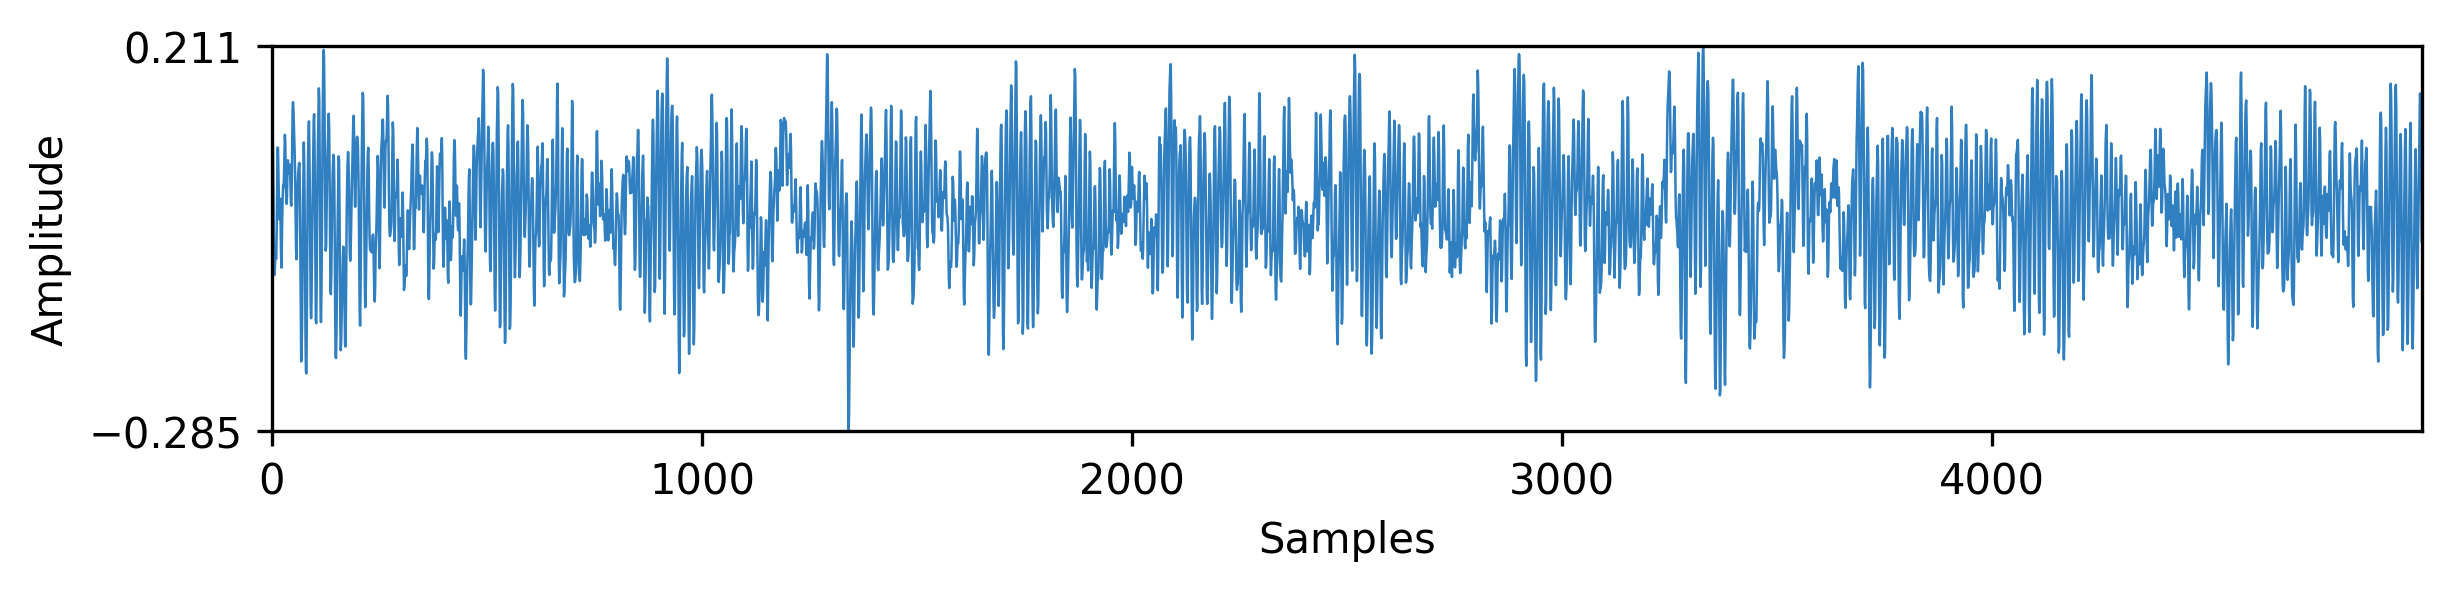

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# 取前 N 個點
N = 5000
sig = df_temp.iloc[:N, 0].to_numpy()

# 扣掉平均值，使訊號以 0 為中心
sig = sig - sig.mean()

# 讓訊號貼住上下邊界
ymin = sig.min()
ymax = sig.max()

# 放大框框（寬 8，高 1.8）
fig, ax = plt.subplots(figsize=(8, 1.8), dpi=300)

# 畫折線，使用 #2F7FC1
ax.plot(
    np.arange(len(sig)),
    sig,
    linewidth=0.6,
    color="#2F7FC1"
)

# 前後不要留空白
ax.set_xlim(0, len(sig) - 1)
ax.margins(x=0)

# 上下各一個座標刻度，並且訊號貼住上下線
ax.set_ylim(ymin, ymax)
ax.set_yticks([ymin, ymax])

# 保留座標標籤
ax.set_xlabel("Samples")
ax.set_ylabel("Amplitude")

plt.tight_layout(pad=0.1)
plt.show()


In [14]:
df=pd.DataFrame(columns=['DE_data','fault'])

for root, dirs, files in os.walk("/content/drive/My Drive/CERU_48k/0_load_48_KHz", topdown=False):
    for file_name in sorted(files):
        path = os.path.join(root, file_name)
        print(path)

        mat = scipy.io.loadmat(path)

        key_name = list(mat.keys())[3]
        DE_data = mat.get(key_name)
        fault = np.full((len(DE_data), 1), file_name[:-4])

        df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})

        df = pd.concat([df,df_temp],axis=0)
        print(df['fault'].unique())

df.to_csv('all_faults.csv',index=False)

/content/drive/My Drive/CERU_48k/0_load_48_KHz/14_BA.mat


/tmp/ipython-input-3814397698.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,df_temp],axis=0)


['14_BA']
/content/drive/My Drive/CERU_48k/0_load_48_KHz/14_IR.mat
['14_BA' '14_IR']
/content/drive/My Drive/CERU_48k/0_load_48_KHz/14_OR1.mat
['14_BA' '14_IR' '14_OR1']
/content/drive/My Drive/CERU_48k/0_load_48_KHz/21_BA.mat
['14_BA' '14_IR' '14_OR1' '21_BA']
/content/drive/My Drive/CERU_48k/0_load_48_KHz/21_IR.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR']
/content/drive/My Drive/CERU_48k/0_load_48_KHz/21_OR1.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR' '21_OR1']
/content/drive/My Drive/CERU_48k/0_load_48_KHz/21_OR2.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR' '21_OR1' '21_OR2']
/content/drive/My Drive/CERU_48k/0_load_48_KHz/21_OR3.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR' '21_OR1' '21_OR2' '21_OR3']
/content/drive/My Drive/CERU_48k/0_load_48_KHz/7_BA.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR' '21_OR1' '21_OR2' '21_OR3'
 '7_BA']
/content/drive/My Drive/CERU_48k/0_load_48_KHz/7_IR.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR' '21_OR1' '21_OR2' '21_OR3'
 '7_BA' '7_IR']
/conte

In [15]:
df = pd.read_csv('all_faults.csv')

In [16]:
df

,DE_data,fault
0,0.039846,14_BA
1,0.089705,14_BA
2,0.136643,14_BA
3,0.177532,14_BA
4,0.205903,14_BA
...,...,...
2782624,-0.059664,N
2782625,-0.063836,N
2782626,-0.034630,N
2782627,0.016689,N


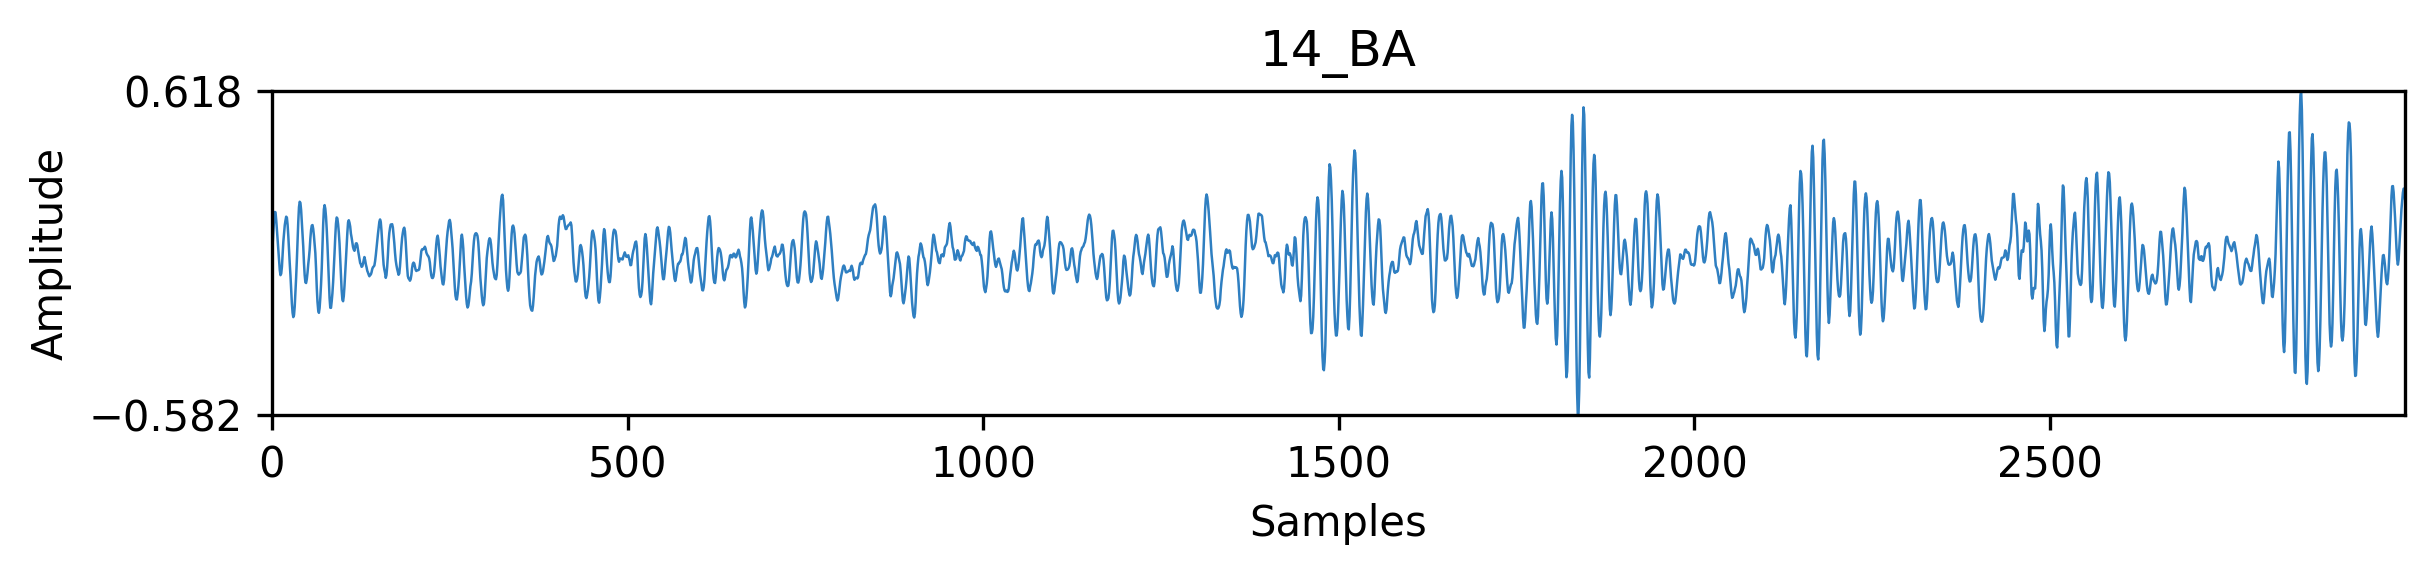

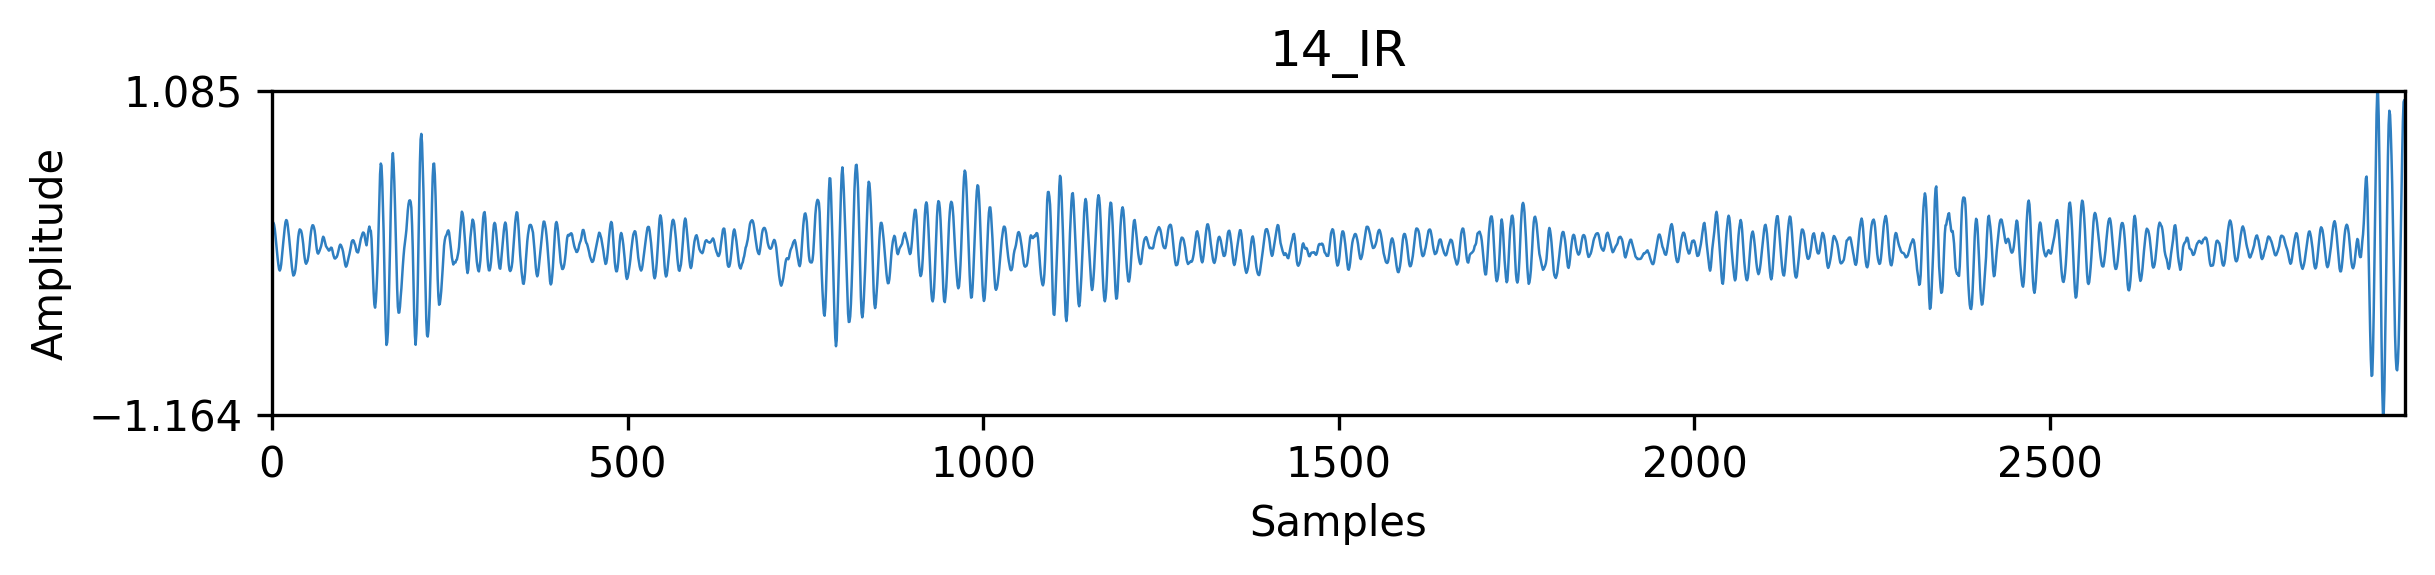

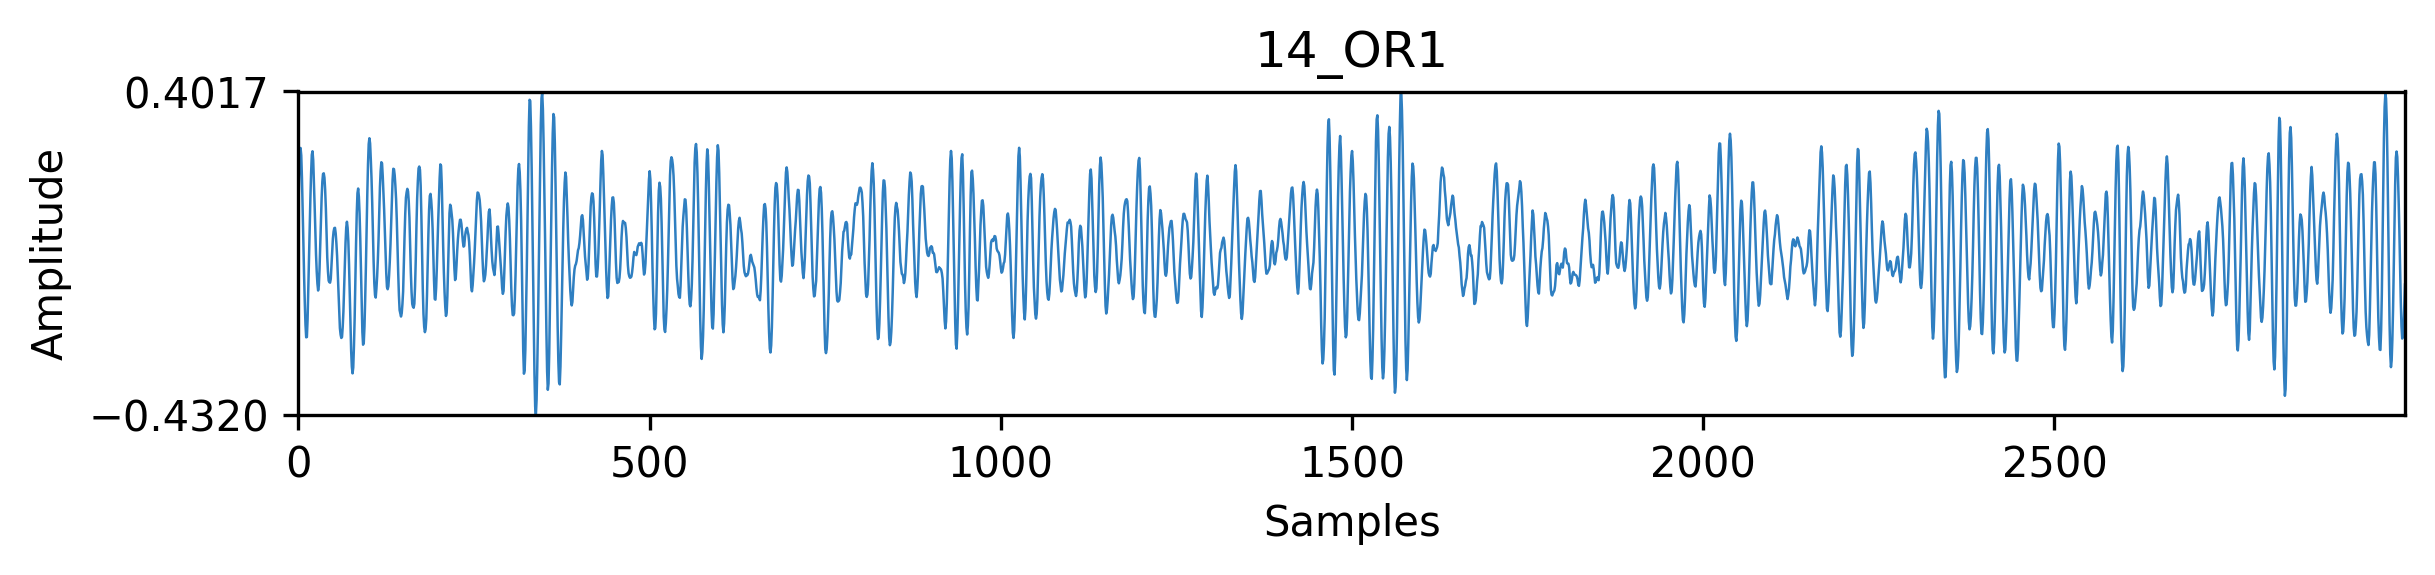

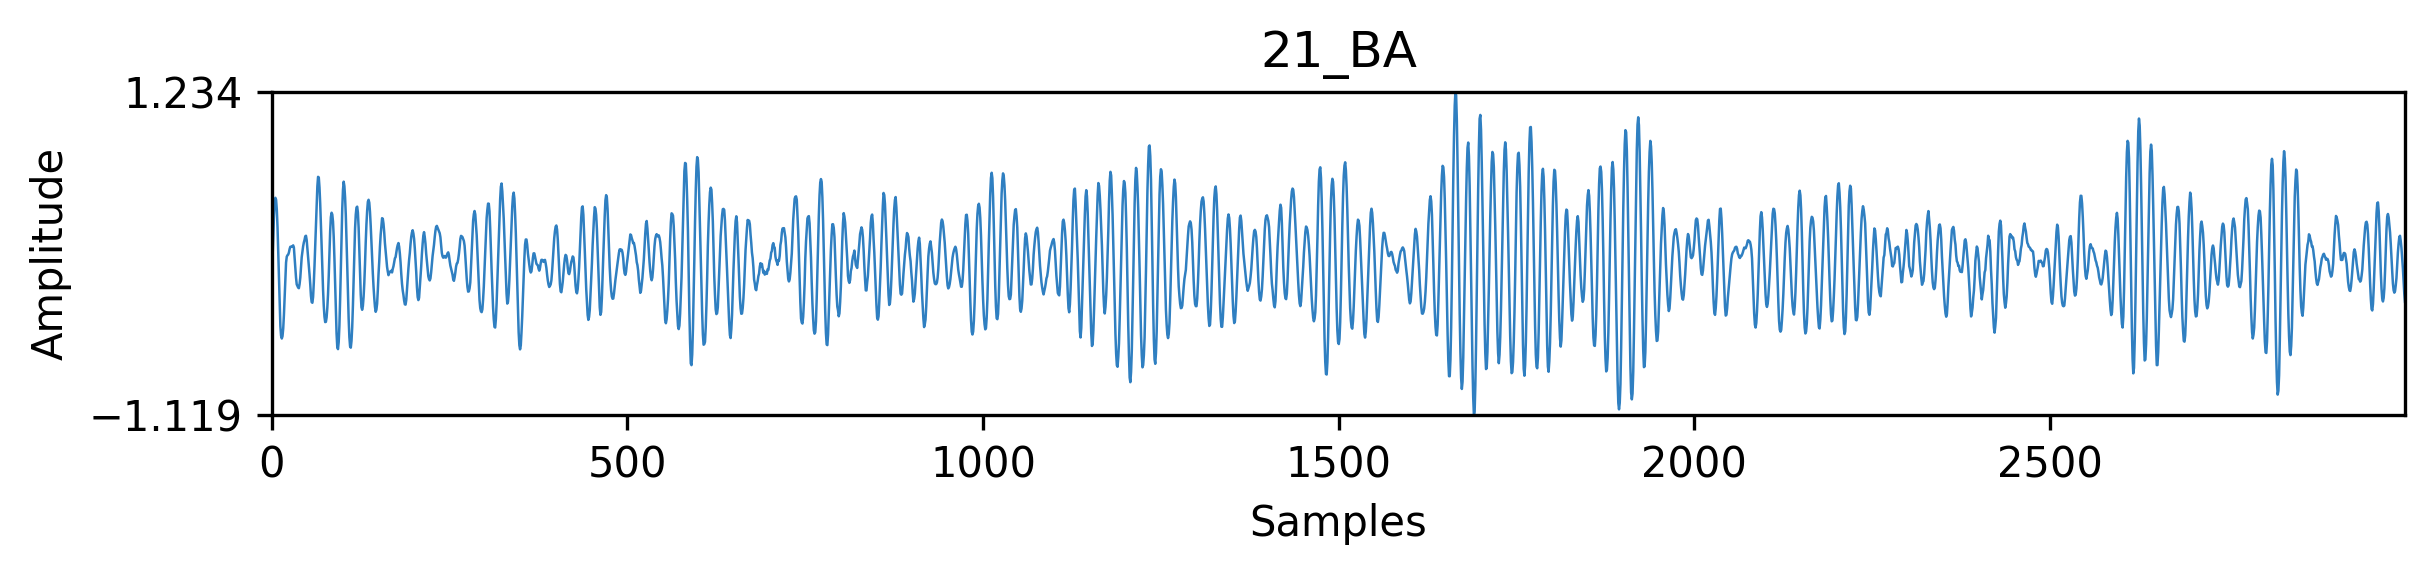

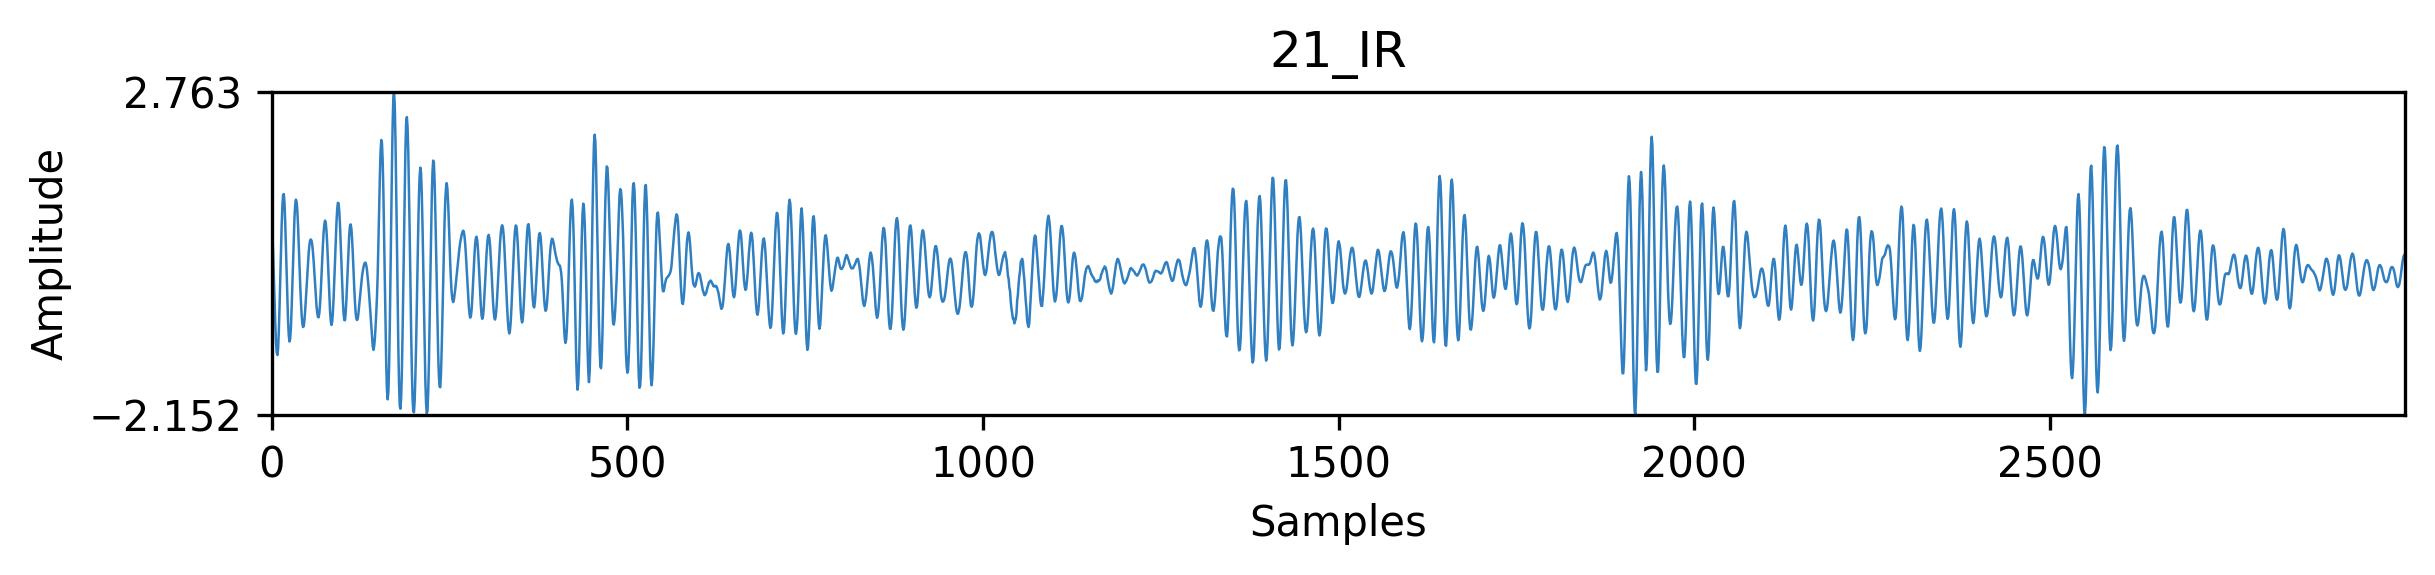

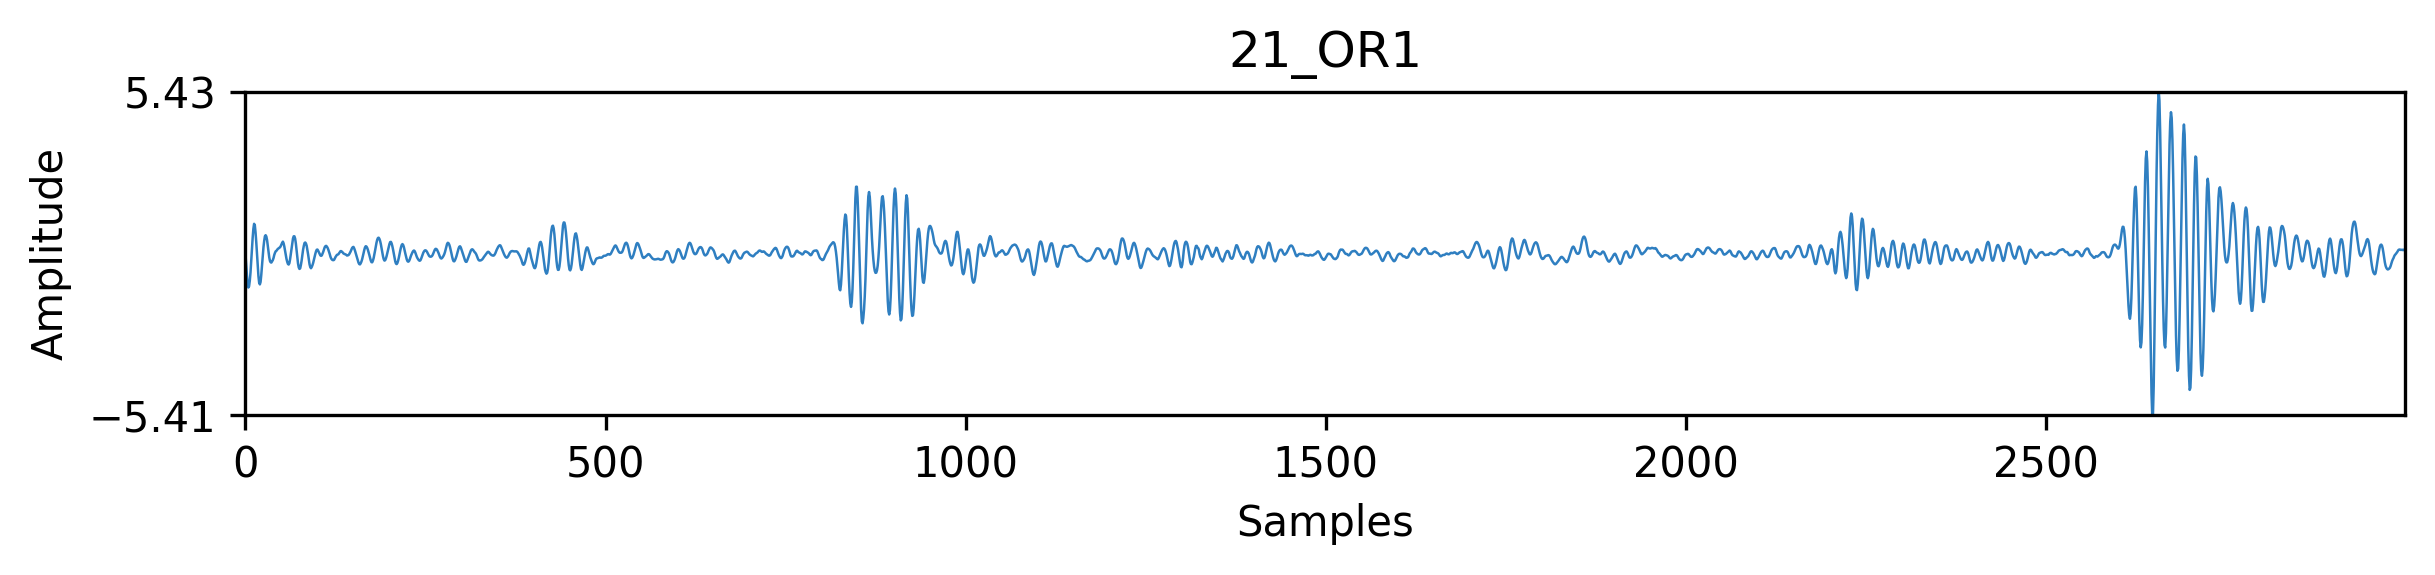

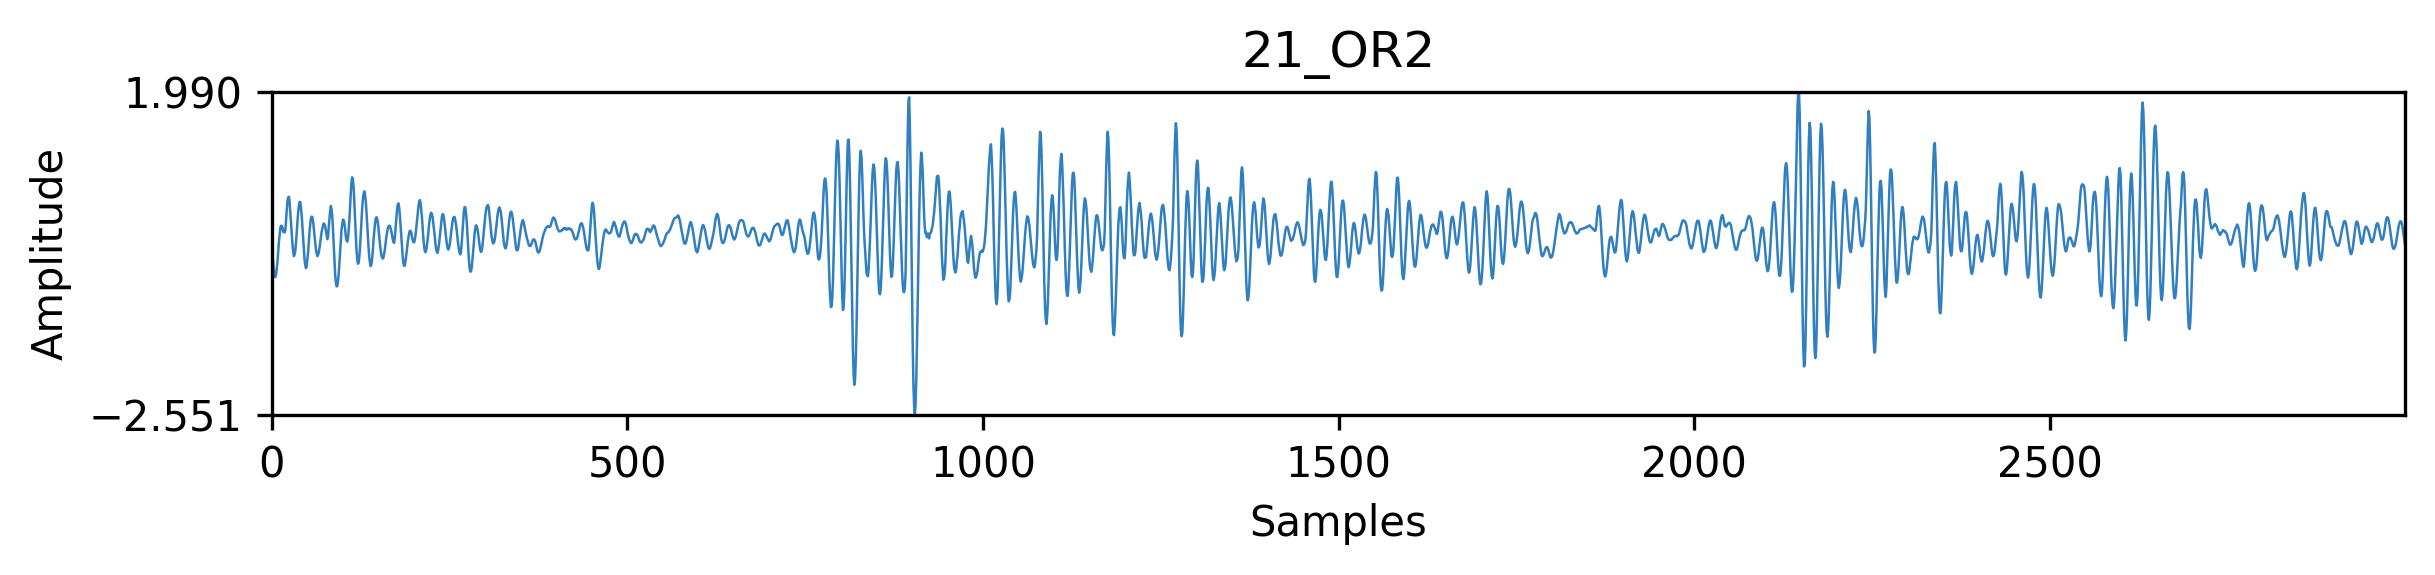

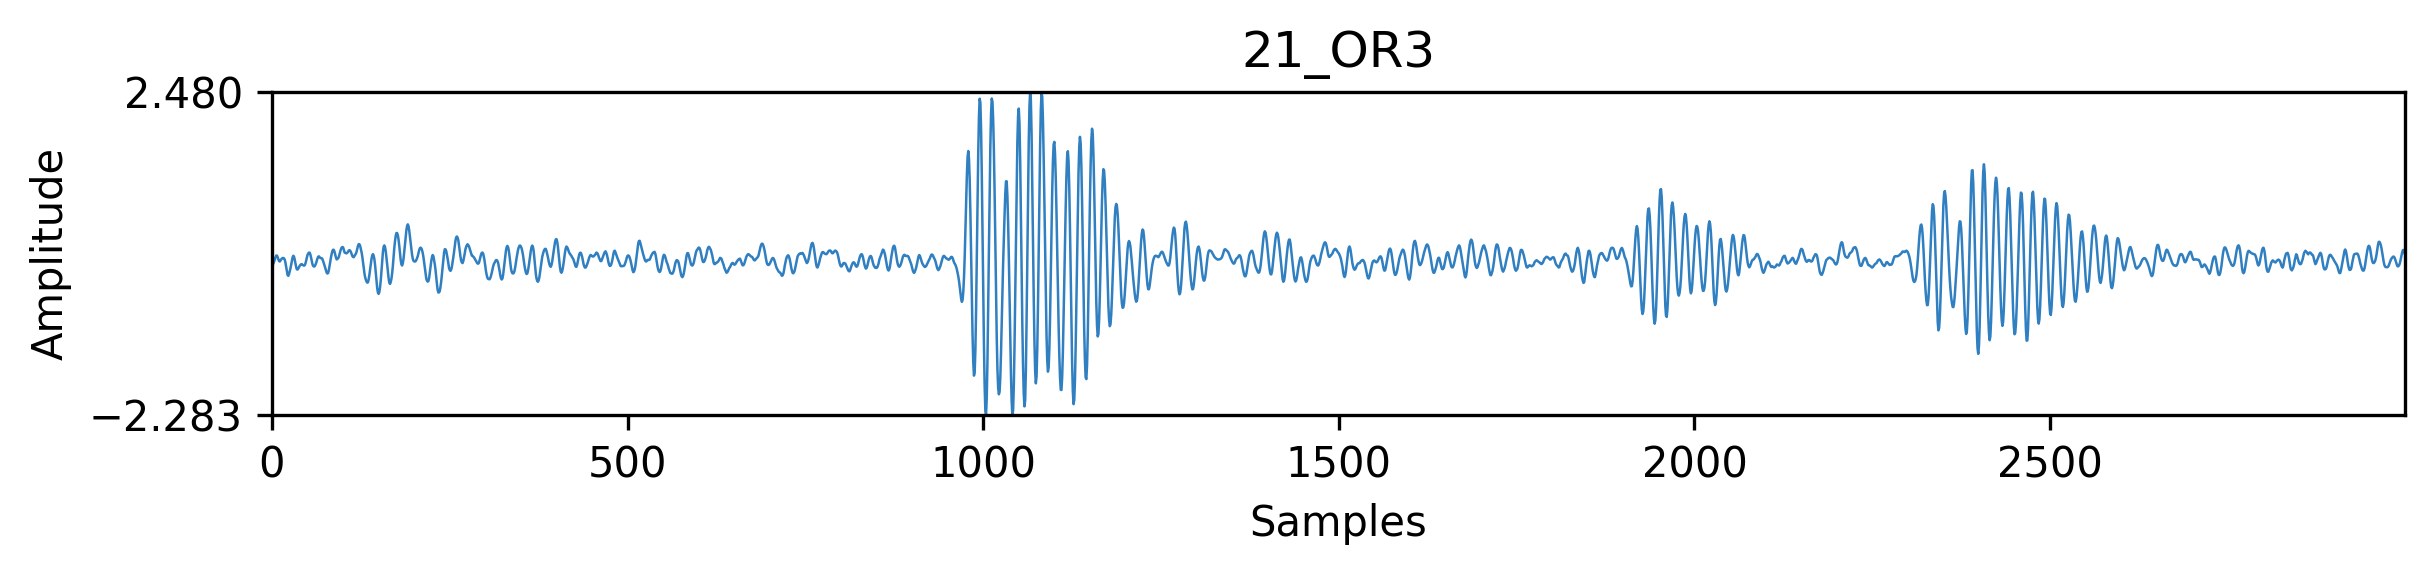

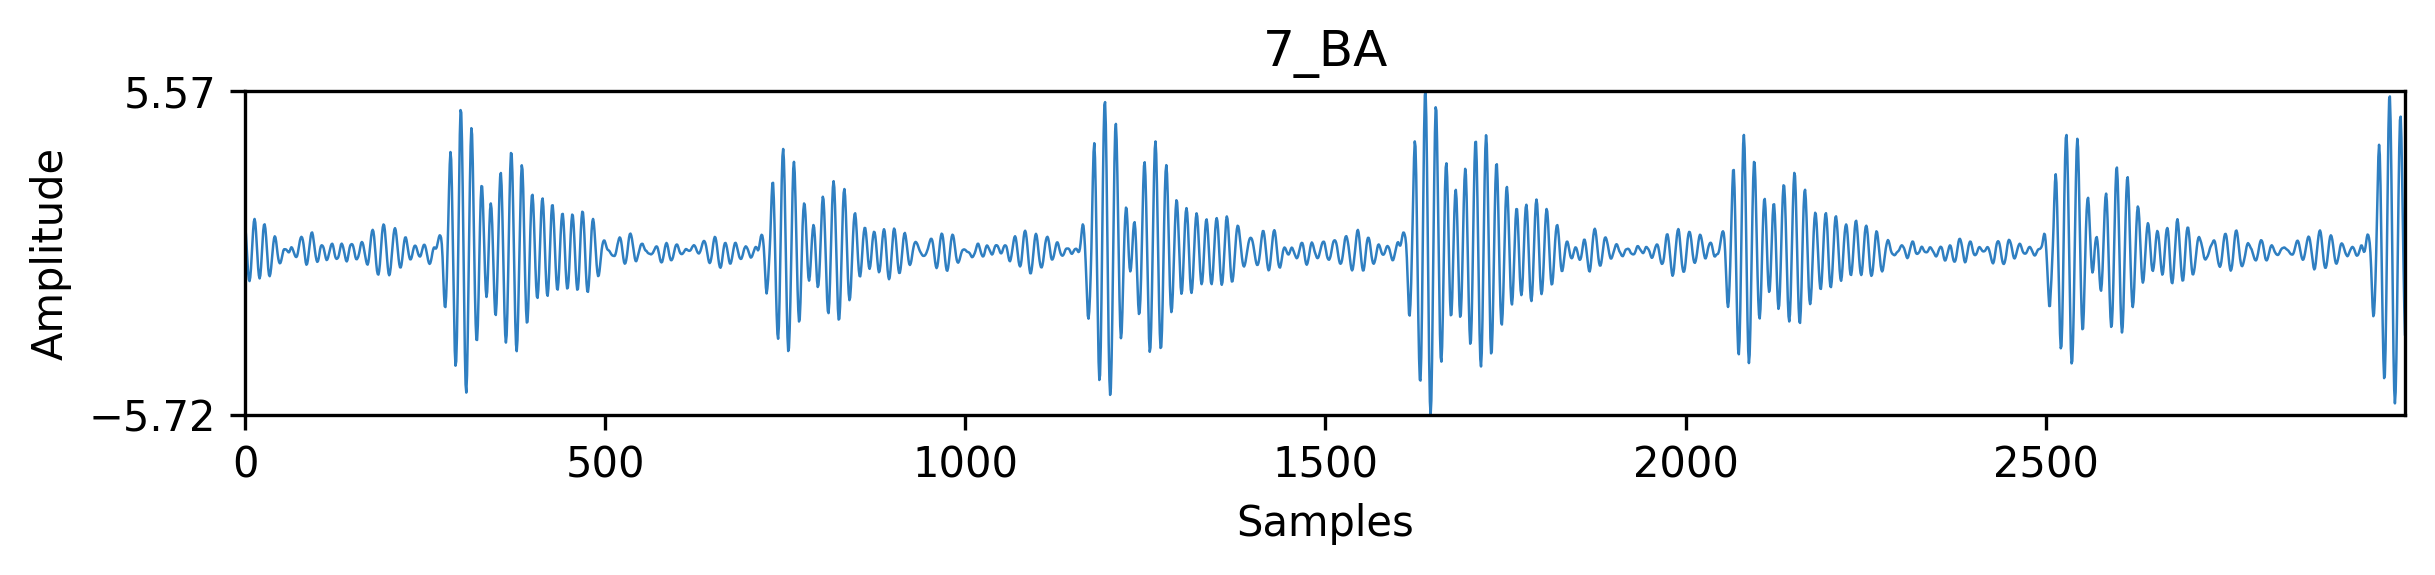

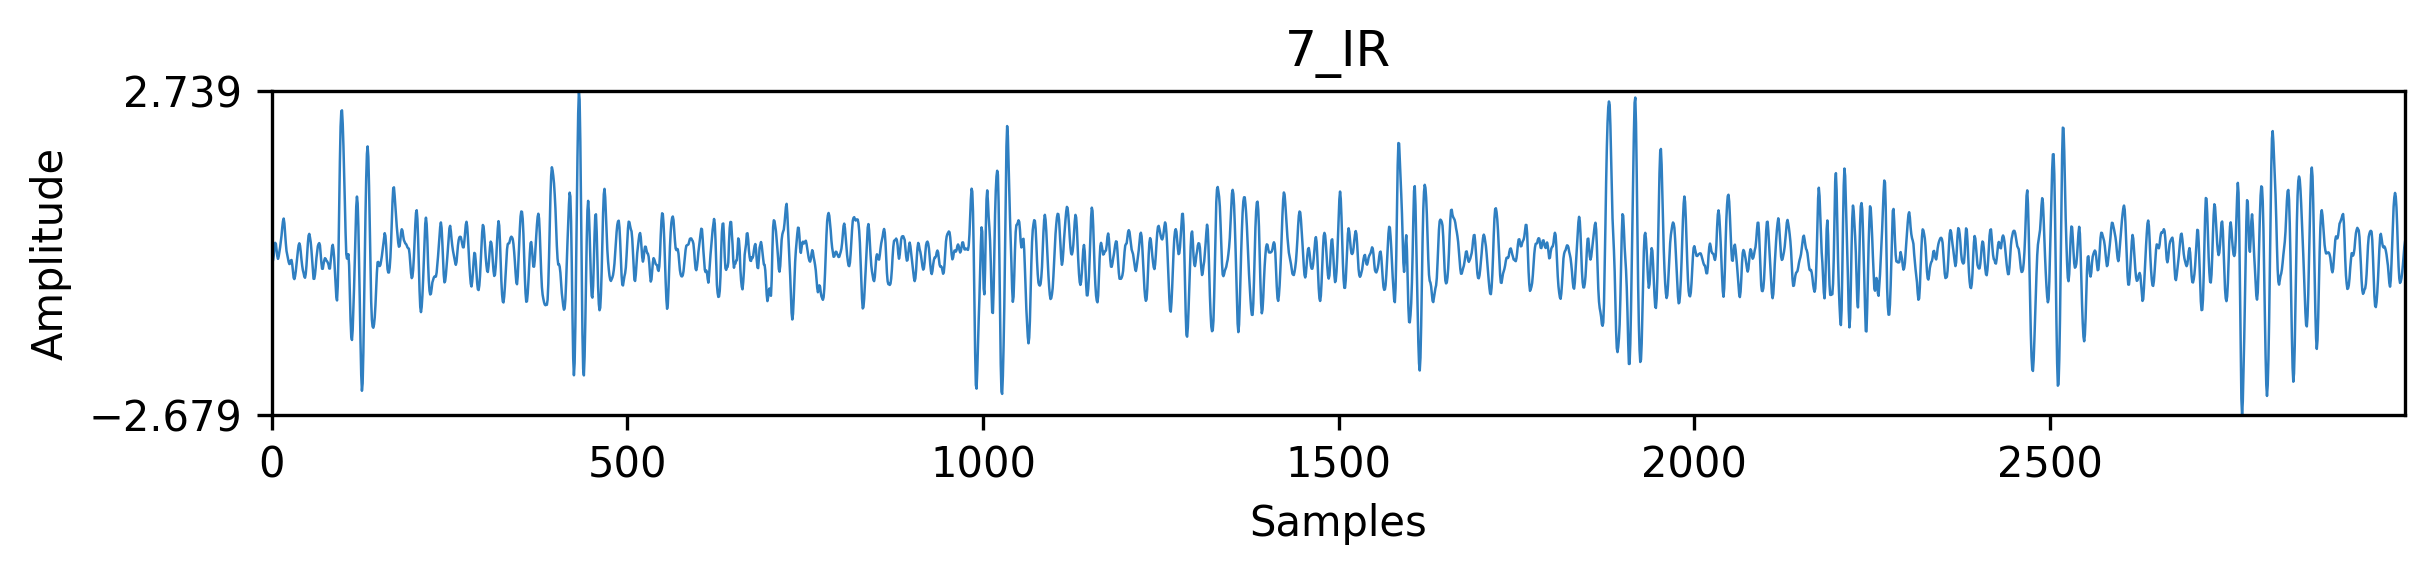

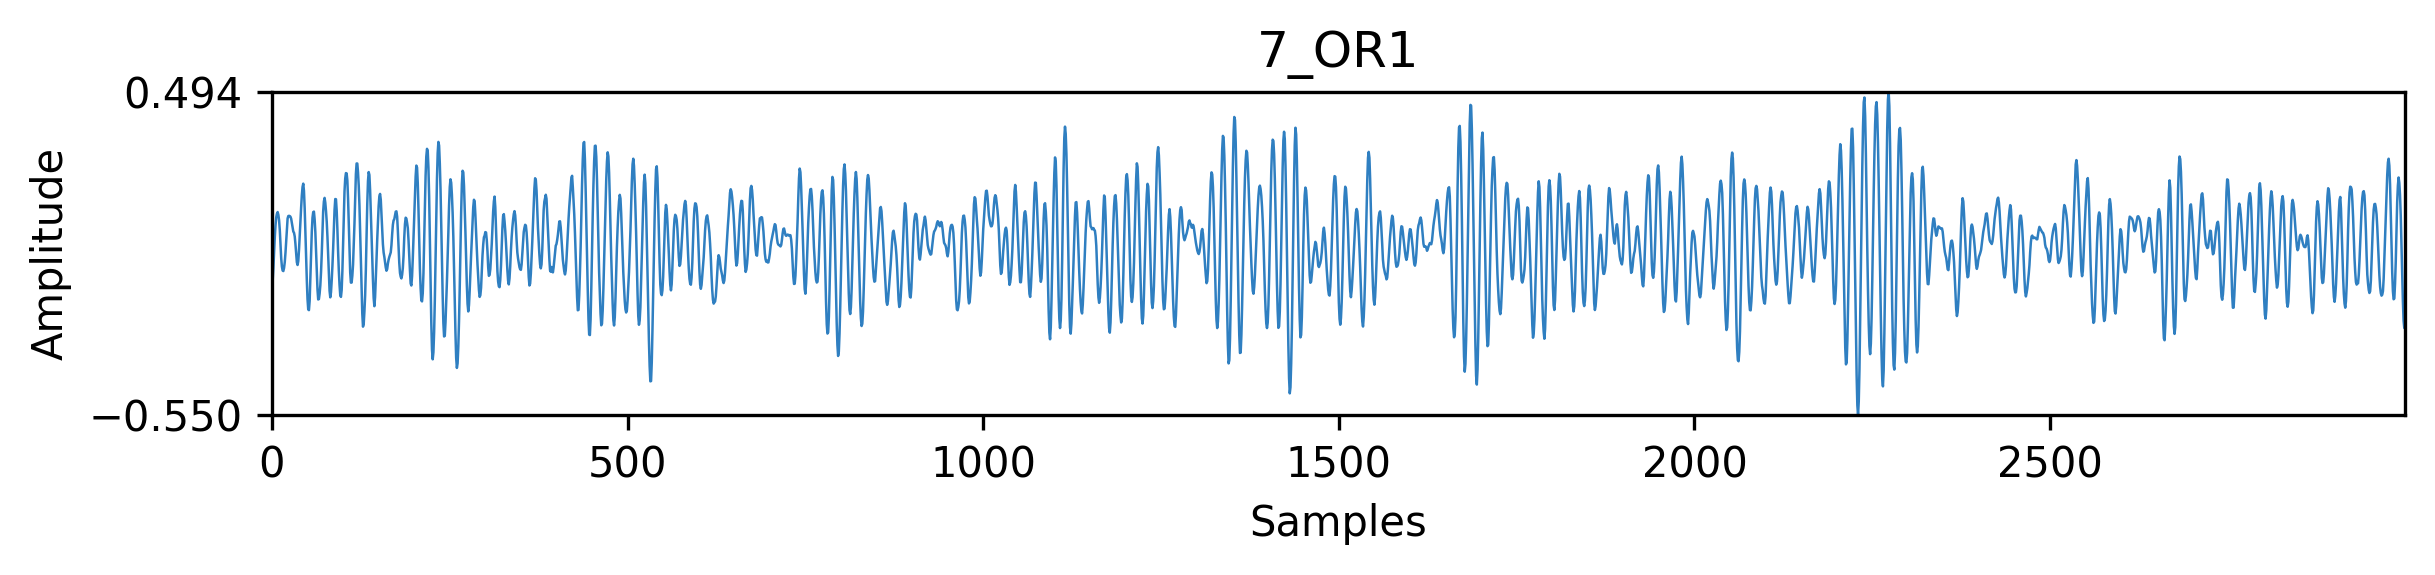

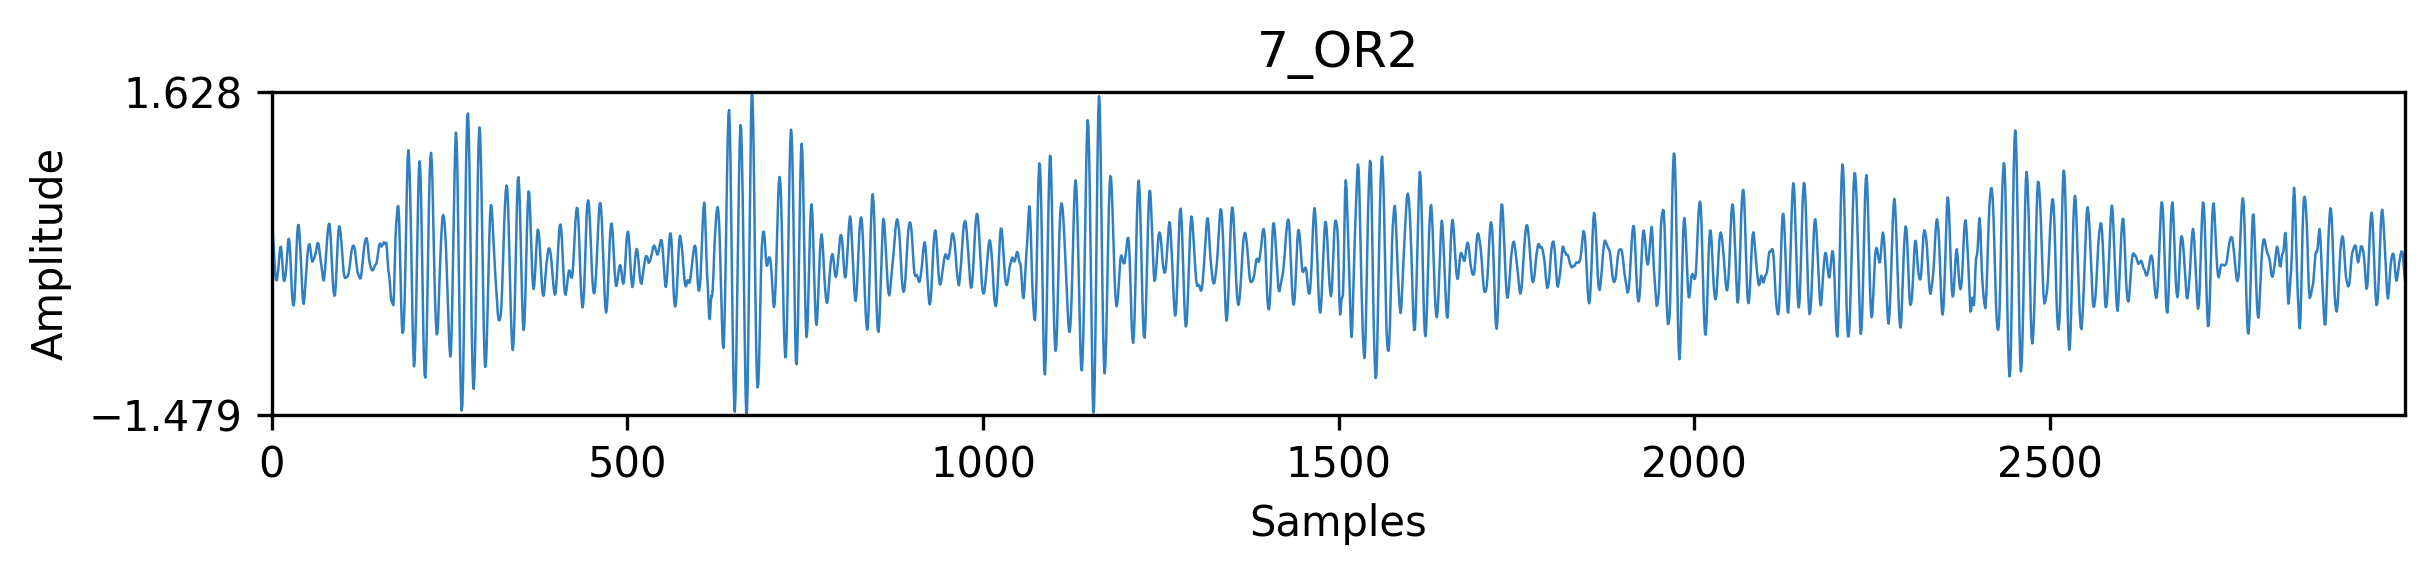

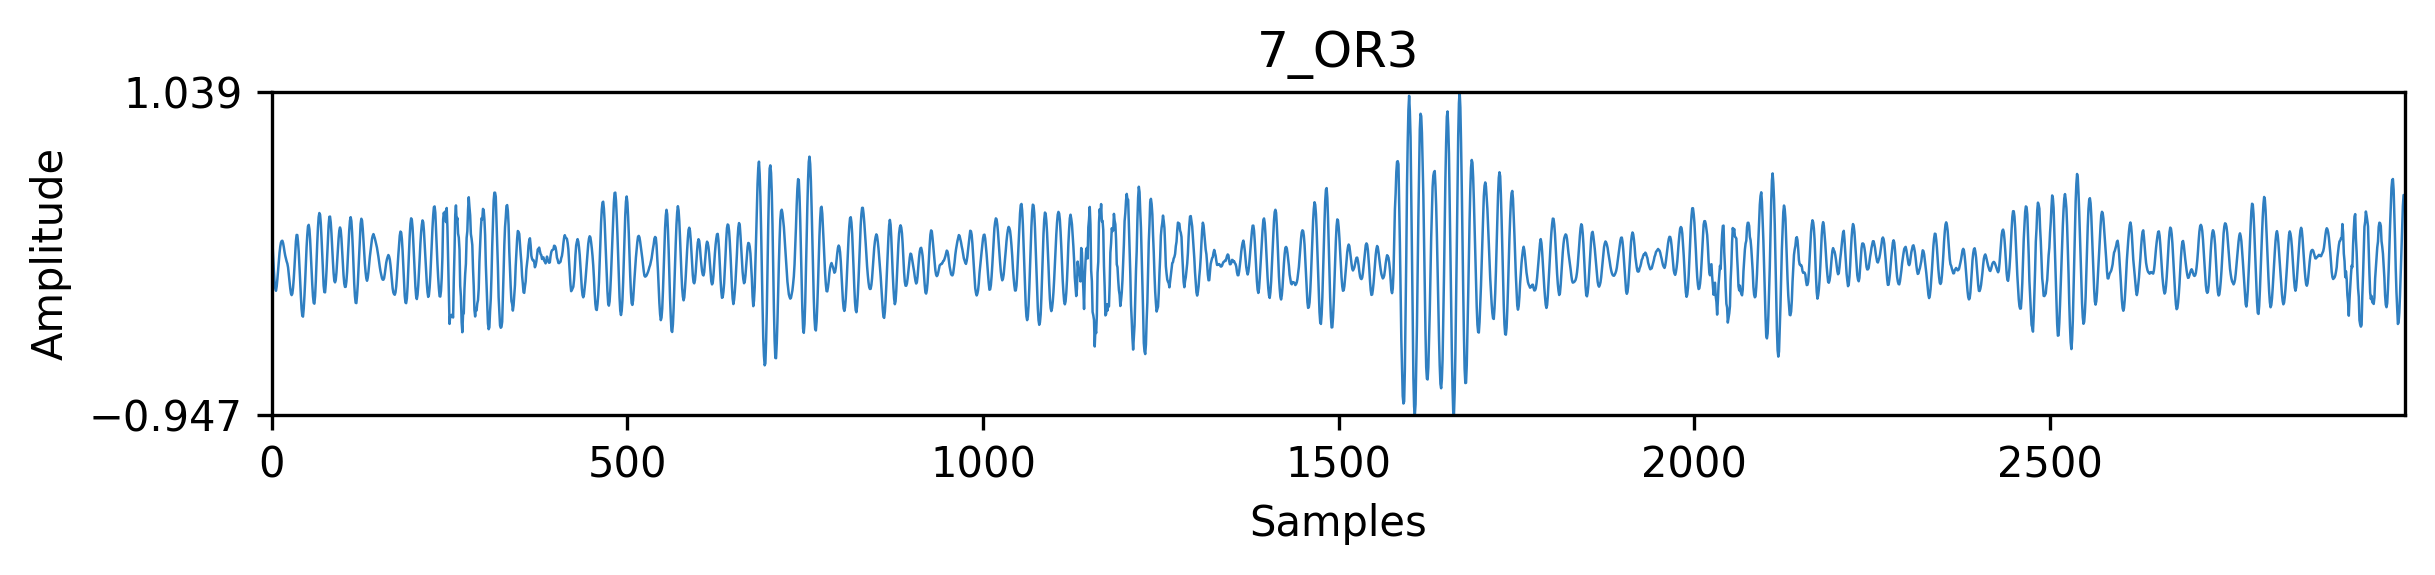

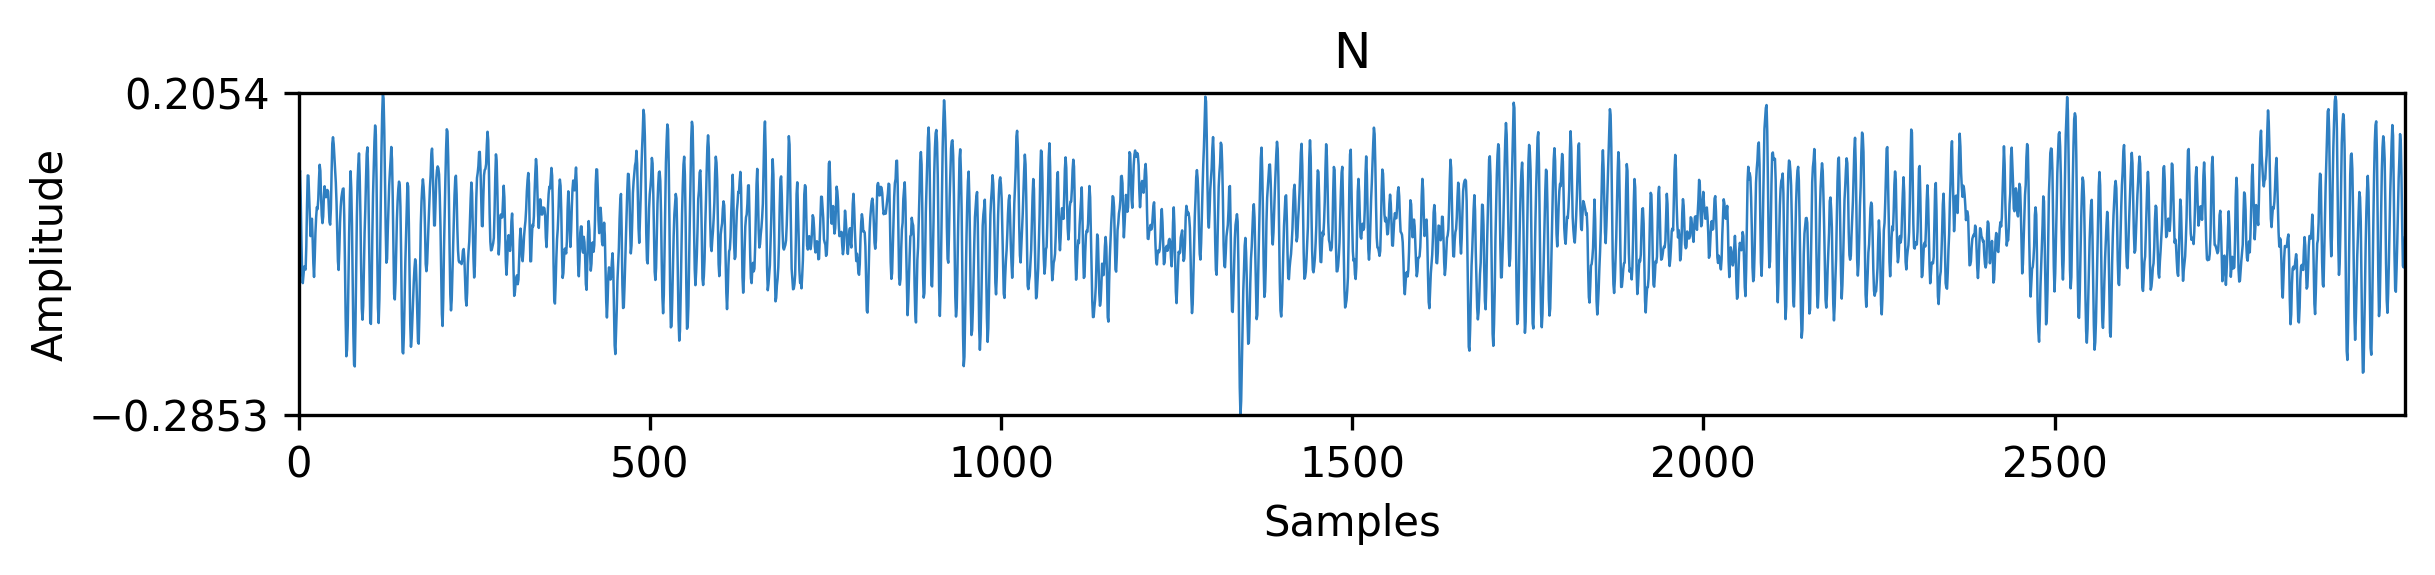

In [30]:
import numpy as np
import matplotlib.pyplot as plt

N = 3000  # 每個 fault 要顯示的訊號點數

faults = df['fault'].unique()

for f in faults:
    # 取出這個 fault 的訊號
    sig_all = df[df['fault'] == f].iloc[:, 0].to_numpy()
    sig = sig_all[:min(N, len(sig_all))]   # 防止點數不夠

    # 可選：扣掉平均值，讓 0 在中間
    sig = sig - sig.mean()

    # 訊號頂住上下邊界
    ymin = sig.min()
    ymax = sig.max()

    # ⬇⬇ 在這裡把每個「框框」加大一點（寬 8、高 1.8）
    fig, ax = plt.subplots(figsize=(8, 1.8), dpi=300)

    ax.plot(
        np.arange(len(sig)),
        sig,
        linewidth=0.6,
        color="#2F7FC1"   # 固定藍色
    )

    # 前後不要留空白
    ax.set_xlim(0, len(sig) - 1)
    ax.margins(x=0)

    # 上下各一個 y 座標刻度，訊號貼住上下線
    ax.set_ylim(ymin, ymax)
    ax.set_yticks([ymin, ymax])

    # 保留座標標籤
    ax.set_title(str(f))
    ax.set_xlabel("Samples")
    ax.set_ylabel("Amplitude")

    plt.tight_layout(pad=0.3)
    plt.show()


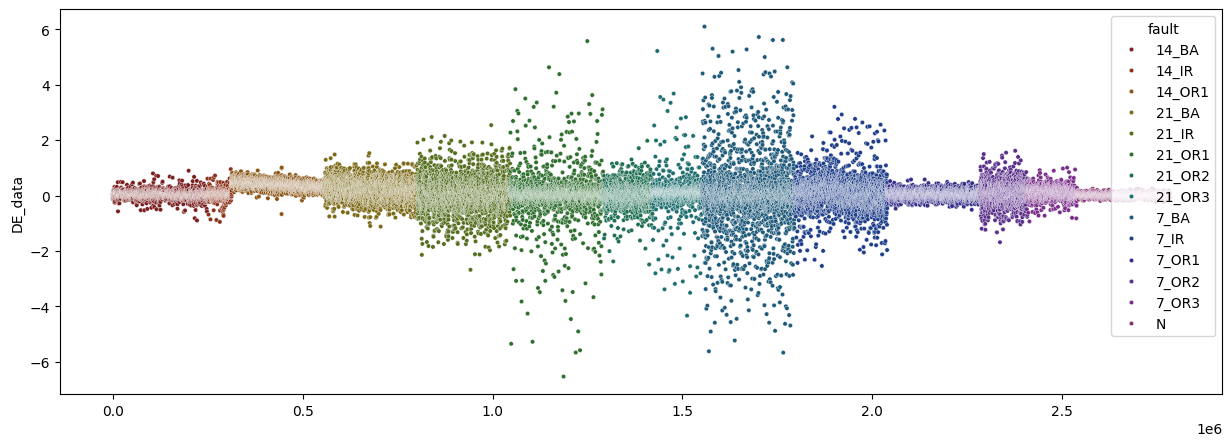

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

palette = [
    "#7A1F1F", "#8C311A", "#8A5516", "#7D6A17",
    "#566F1F", "#2F6F2F", "#1F6F52", "#1F6F6F",
    "#1F5A7A", "#1F3F8A", "#352F8A", "#5A2F8A",
    "#7A2F8A", "#8A2F6F"
]

plt.figure(figsize=(15, 5))

sns.scatterplot(
    data=df.iloc[::100, :],
    y="DE_data",
    x=np.arange(0, len(df), 100),
    hue="fault",
    palette=palette,
    s=10,

)

plt.show()

